In [26]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [19]:
bodyfat_df = pd.read_csv("../data/BodyFat.csv")

In [20]:
bodyfat_df = bodyfat_df[bodyfat_df['BODYFAT'] > 0]

bodyfat_df.HEIGHT[bodyfat_df.HEIGHT == 29.5] = math.sqrt(703*bodyfat_df.WEIGHT[bodyfat_df.HEIGHT == 29.5] / bodyfat_df.ADIPOSITY[bodyfat_df.HEIGHT == 29.5])

In [21]:
bodyfat_df = bodyfat_df[bodyfat_df.ABDOMEN <140]

In [22]:
bodyfat_df["ABDOMEN_in"] = bodyfat_df.ABDOMEN * 0.393701

In [24]:
bodyfat_df.describe()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,ABDOMEN_in
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.0000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,126.628000,18.954800,1.055502,44.900000,178.429200,70.308702,25.372400,37.95600,100.7688,92.42640,99.773200,59.34320,38.568800,23.088000,32.240800,28.678800,18.224000,36.388366
std,72.887172,7.630898,0.018672,12.648555,26.822555,2.613157,3.314262,2.27691,8.0470,10.13155,6.453849,4.90472,2.305517,1.640776,2.909618,2.012209,0.908938,3.988801
min,1.000000,1.900000,0.995000,22.000000,125.000000,64.000000,19.100000,31.10000,83.4000,70.40000,85.300000,49.30000,33.000000,19.100000,24.800000,21.000000,15.800000,27.716550
25%,64.250000,12.900000,1.041450,35.250000,159.250000,68.312500,23.100000,36.40000,94.4500,84.75000,95.525000,56.02500,37.025000,22.000000,30.225000,27.300000,17.600000,33.366160
50%,126.500000,19.000000,1.054900,43.000000,176.500000,70.000000,25.050000,38.00000,99.6500,90.95000,99.300000,59.00000,38.500000,22.800000,32.050000,28.700000,18.300000,35.807106
75%,189.750000,24.575000,1.070375,54.000000,196.937500,72.250000,27.300000,39.40000,105.3000,99.20000,103.425000,62.30000,39.900000,24.000000,34.300000,30.000000,18.800000,39.055139
max,252.000000,45.100000,1.099100,81.000000,262.750000,77.750000,39.100000,43.90000,128.3000,126.20000,125.600000,74.40000,46.000000,33.900000,39.100000,34.900000,21.400000,49.685066


In [28]:
X = bodyfat_df[['WEIGHT', 'ABDOMEN_in']].values.reshape(-1,2)
Y = bodyfat_df['BODYFAT']

In [25]:
x_pred = np.linspace(115, 275, 100)   # range of Weight values
y_pred = np.linspace(25, 50, 100)  # range of Abdomen values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [29]:
x = X[:, 0]
y = X[:, 1]
z = Y

In [30]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [31]:
r2 = model.score(X, Y)

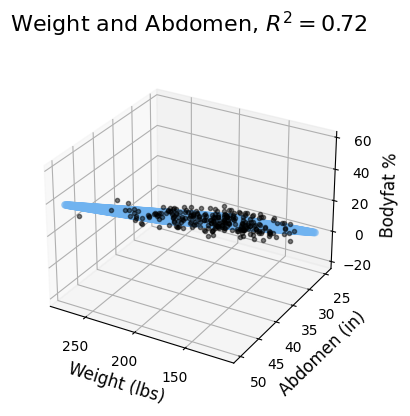

In [45]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(132, projection='3d')
#ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='.', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Weight (lbs)', fontsize=12)
    ax.set_ylabel('Abdomen (in)', fontsize=12)
    ax.set_zlabel('Bodyfat %', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
#ax2.view_init(elev=4, azim=114)
#ax3.view_init(elev=60, azim=165)

fig.suptitle('Weight and Abdomen, $R^2 = %.2f$' % r2, fontsize=16)

fig.tight_layout()

In [46]:
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('../images/3dgif/gif_image%d.png' % ii)